<a href="https://colab.research.google.com/github/Elwing-Chou/ml0716/blob/master/transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
f = zipfile.ZipFile("drive/My Drive/additional/train.zip")
f.extractall("datas")

In [6]:
import glob
import pandas as pd
dogs = glob.glob("datas/train/dog.*")
cats = glob.glob("datas/train/cat.*")
df = pd.DataFrame({
    "path":dogs + cats,
    "ans":[0] * len(dogs) + [1] * len(cats)
})
df

,path,ans
0,datas/train/dog.11834.jpg,0
1,datas/train/dog.2311.jpg,0
2,datas/train/dog.4547.jpg,0
3,datas/train/dog.4702.jpg,0
4,datas/train/dog.5517.jpg,0
...,...,...
24995,datas/train/cat.325.jpg,1
24996,datas/train/cat.8744.jpg,1
24997,datas/train/cat.8227.jpg,1
24998,datas/train/cat.3499.jpg,1


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in cnn.layers:
    layer.trainable = False
mlp = [
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(2, activation="softmax")
]
model = Sequential(cnn.layers + mlp)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [12]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

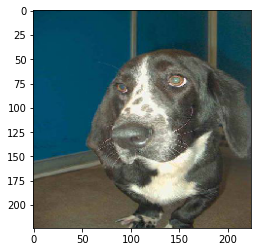

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
img = load_img(df["path"][0], target_size=(224, 224))
plt.imshow(img)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
# 只要開始處理, 就不要df, 改用np.array
x = np.array(df["path"])
y = np.array(df["ans"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [25]:
from tensorflow.keras.applications.vgg16 import preprocess_input
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
def get_data(x, y, batch=20):
    idx = np.random.randint(0, len(x), batch)
    x_idx, y_idx = x[idx], y[idx]
    x_ori, x_norm, y_ori = [], [], y_idx
    for p in x_idx:
        img = np.array(load_img(p, target_size=(224, 224)))
        img_pre = preprocess_input(img)
        x_ori.append(img)
        x_norm.append(img_pre)
    return np.array(x_ori), np.array(x_norm), np.array(y_ori)
# get_data(x_train, y_train, 1)